In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
tran_df=np.sqrt(df)

In [15]:
input_cols=tran_df.drop(['csMPa'],axis=1)
target_cols=tran_df['csMPa']
x_train,x_test,y_train,y_test=train_test_split(input_cols,target_cols,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((703, 8), (302, 8), (703,), (302,))

In [16]:
rf_model=RandomForestRegressor(max_depth=5,random_state=1).fit(x_train,y_train)
validate_y_pred=rf_model.predict(x_test)
rmse=mean_squared_error(y_test,validate_y_pred,squared=False)
print('Root Mean Squared Error:',round(np.sqrt(rmse), 4))
r2_value_rfe = rf_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = rf_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.7754
r-squared :  0.8836578671604377
r-squared :  0.8316499324850676


In [17]:
dt_model=DecisionTreeRegressor(max_depth=5,random_state=1).fit(x_train,y_train)
validate_y_pred=dt_model.predict(x_test)
rmse=mean_squared_error(y_test,validate_y_pred,squared=False)
print('Root Mean Squared Error:',round(np.sqrt(rmse), 4))
r2_value_rfe = rf_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = rf_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.857
r-squared :  0.8836578671604377
r-squared :  0.8316499324850676


In [18]:
rf_model=RandomForestRegressor(max_depth=5,random_state=1).fit(x_train,y_train)
validate_y_pred=rf_model.predict(x_test)
rmse=mean_squared_error(y_test,validate_y_pred,squared=False)
print('Root Mean Squared Error:',round(np.sqrt(rmse), 4))
r2_value_rfe = rf_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = rf_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.7754
r-squared :  0.8836578671604377
r-squared :  0.8316499324850676


In [41]:
dt_model=DecisionTreeRegressor(max_depth=5,random_state=1).fit(x_train,y_train)
validate_y_pred=dt_model.predict(x_test)
rmse=mean_squared_error(y_test,validate_y_pred,squared=False)
print('Root Mean Squared Error:',round(np.sqrt(rmse), 4))
r2_value_rfe = rf_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = rf_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.8684
r-squared :  0.8552246816692122
r-squared :  0.7661750439935542


In [21]:
enet = ElasticNet(alpha=0.1,l1_ratio=0.5).fit(x_train,y_train)
y_pred=enet.predict(x_test)
mse_test=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error:',round(np.sqrt(mse_test), 4))
r2_value_rfe = enet.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = enet.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.8045
r-squared :  0.7404314957454639
r-squared :  0.69859381426768


In [20]:
#Hyper parameter tuning
#Grid search
from sklearn.linear_model import ElasticNet
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.5} 



In [28]:
#Removing insignificant variables
input_cols=tran_df.drop(['csMPa','water','superplasticizer','coarseaggregate','fineaggregate'],axis=1)
target_cols=tran_df['csMPa']
x_train,x_test,y_train,y_test=train_test_split(input_cols,target_cols,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((721, 4), (309, 4), (721,), (309,))

In [29]:
lin_model=LinearRegression().fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
mse_test=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error:',round(np.sqrt(mse_test), 4))
r2_value_rfe = lin_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = lin_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.9015
r-squared :  0.688987639070534
r-squared :  0.5751469890958112


In [30]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(x_train, y_train)
train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)


test_pred = lasso_model.predict(x_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

df_lasso_coeff = pd.DataFrame(data = {'Variable': x_train.columns, 'Coefficient': lasso_model.coef_})

print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

#Can remove the Status_Developing as it is leastly impacting

Root Mean Squared Error (RMSE) on training set:  1.0908
Root Mean Squared Error (RMSE) on test set:  1.0242
Least significant variables obtained from Lasso Regression when alpha is 1: []


In [4]:
input_cols=tran_df.drop(['csMPa'],axis=1)
target_cols=tran_df['csMPa']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(input_cols,target_cols,test_size=0.3,random_state=1)
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((721, 8), (309, 8), (721,), (309,))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
lin_model=LinearRegression().fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
mse_test=mean_squared_error(y_pred,y_test)
print('Root Mean Squared Error:',round(np.sqrt(mse_test), 4))
r2_value_rfe = lin_model.score(x_train, y_train)
print('r-squared : ', r2_value_rfe)
r2_value_rfe_test = lin_model.score(x_test, y_test)
print('r-squared : ', r2_value_rfe_test)

Root Mean Squared Error: 0.7765
r-squared :  0.7610649557308017
r-squared :  0.6847533302700095


In [17]:
#Model Evaluation using Cross validation score
scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All Train scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))


scores = cross_val_score(   estimator = LinearRegression(), 
                            X = x_test, 
                            y = y_test, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('\nAll Test scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All Train scores:  [0.69341927 0.79037552 0.78876145 0.74586429 0.7540509 ]

Minimum score obtained:  0.6934
Maximum score obtained:  0.7904
Average score obtained:  0.7545

All Test scores:  [0.63262019 0.72342705 0.59257141 0.73686041 0.70746009]

Minimum score obtained:  0.5926
Maximum score obtained:  0.7369
Average score obtained:  0.6786


In [8]:
import statsmodels.api as sm
X=input_cols
y=target_cols
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8370.
Date:                Wed, 22 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:04:51   Log-Likelihood:                         -1142.7
No. Observations:                1030   AIC:                                      2301.
Df Residuals:                    1022   BIC:                                      2341.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

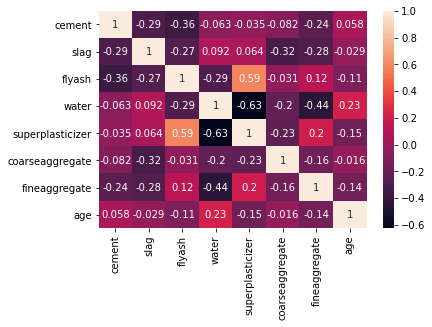

In [74]:
sns.heatmap(input_cols.corr(),annot=True)
plt.show()

In [7]:
input_cols=df.drop(['csMPa'],axis=1)
target_cols=df['csMPa']

In [51]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
input_sc=minmax.fit_transform(input_cols)
input_sc=pd.DataFrame(data=input_sc,columns=input_cols.columns)

In [8]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
input_st=standard.fit_transform(input_cols)
input_st=pd.DataFrame(data=input_st,columns=input_cols.columns)

In [64]:
np.sqrt(df).skew()

cement              0.238154
slag                0.304994
flyash              0.264502
water              -0.158241
superplasticizer   -0.125252
coarseaggregate    -0.150530
fineaggregate      -0.395881
age                 1.580774
csMPa              -0.174911
dtype: float64

In [52]:
input_sc.skew()

cement              0.564959
slag                0.855225
flyash              0.497231
water               0.034433
superplasticizer    0.980604
coarseaggregate    -0.065256
fineaggregate      -0.252353
age                 3.253974
dtype: float64

In [54]:
input_st.skew()

cement              0.564959
slag                0.855225
flyash              0.497231
water               0.034433
superplasticizer    0.980604
coarseaggregate    -0.065256
fineaggregate      -0.252353
age                 3.253974
dtype: float64

In [5]:
#Removing Outliers
Q1 = data.quantile(0.01)
Q3 = data.quantile(0.99)
IQR = Q3 - Q1
df=data[~((data < (Q1-1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]

In [39]:
data.shape

(1005, 9)

In [4]:
data=df.drop_duplicates()

In [25]:
df.shape

(1030, 9)

In [23]:
df.duplicated().sum()
#df.isna().sum()
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [3]:
df.columns=df.columns.str.strip()
df.columns = df.columns.str.replace(" " ,"_")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.skew()

cement              0.509481
slag                0.800717
flyash              0.537354
water               0.074628
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
csMPa               0.416977
dtype: float64

C:\Ashwin\Learning\Datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

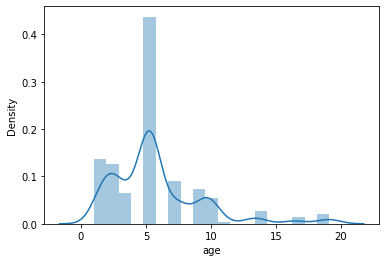

In [65]:
sns.distplot(np.sqrt(df['age']))

C:\Ashwin\Learning\Datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

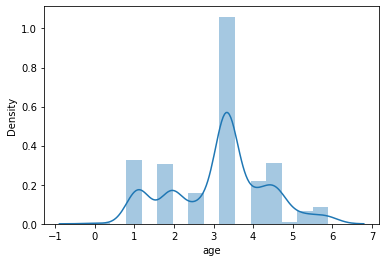

In [62]:
sns.distplot(np.log(df['age']))

C:\Ashwin\Learning\Datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

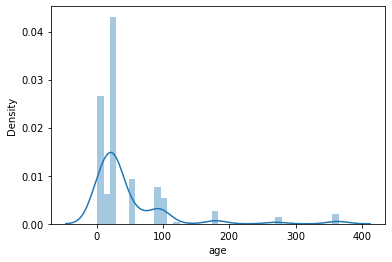

In [18]:
sns.distplot(df['age'])

In [10]:
df.kurt()

cement              -0.520652
slag                -0.508175
flyash              -1.328746
water                0.122082
superplasticizer     1.411269
coarseaggregate     -0.599016
fineaggregate       -0.102177
age                 12.168989
csMPa               -0.313725
dtype: float64